`$sug`s visualization

In [1]:
evaluator_to_sug_file = '../Resources/evaluator_to_sug.tsv'

In [13]:
import json
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords

In [3]:
evaluator_to_sugs = {}
cnt = 0
with open(evaluator_to_sug_file) as f:
    next(f)
    for line in f:
        ln = line.strip().split('\t')
        if len(ln) - 1:
            try:
                evaluator_to_sugs[ln[0]].append(ln[1])
            except KeyError:
                evaluator_to_sugs[ln[0]] = [ln[1]]

In [4]:
all_sugs_combined = ' '.join([
    ' '.join(evaluator_to_sugs[evaluator])
    for evaluator in evaluator_to_sugs
])

In [5]:
evaluator_to_all_associated_sugs = {
    evaluator: ' '.join(evaluator_to_sugs[evaluator])
    for evaluator in evaluator_to_sugs
}

In [6]:
ps = PorterStemmer()
ct = Counter()

In [7]:
sw = {ps.stem(x) for x in set(stopwords.words('english'))}

In [8]:
sw |= {
    ps.stem(x)
    for x in set(json.load(open('../WorkingJsons/20190714_stopwords_for_sugs.json')))
}

In [9]:
all_sugs_stemmed = [
    ps.stem(x)
    for x in all_sugs_combined.split()
]

In [10]:
for w in all_sugs_stemmed:
    if w not in sw:
        ct[w] += 1

In [40]:
punct = '.,;:/?!()\"\''

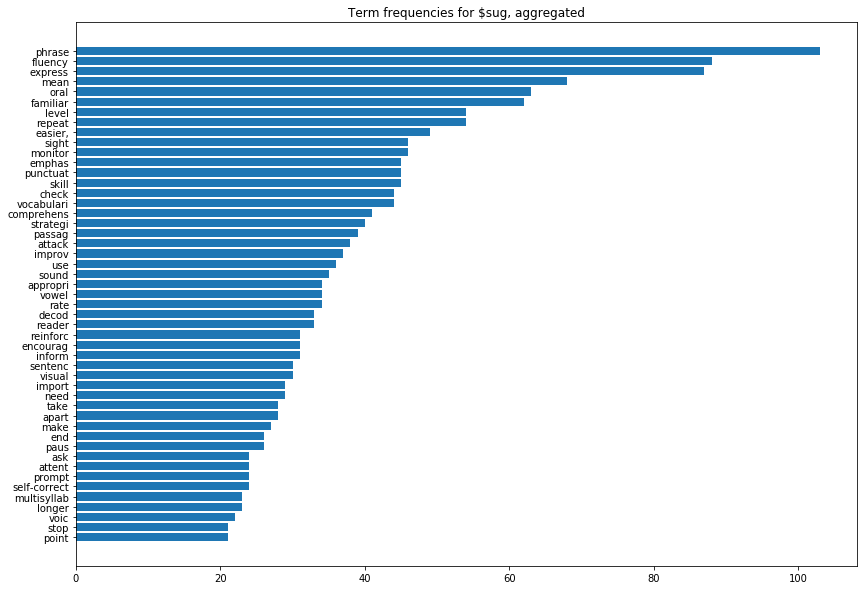

In [15]:
n = 50
most_common = dict(ct.most_common(n))
most_common['fluency'] = most_common['fluenci'] + most_common['fluent']
most_common.pop('fluenci')
most_common.pop('fluent')
sort = sorted(most_common.keys(), key=lambda k: -most_common[k])

terms = [x for x in sort][::-1]
freq = [most_common[x] for x in sort][::-1]

plt.figure(figsize=(14, 10))
plt.title('Term frequencies for $sug, aggregated')
plt.barh(terms, freq)
plt.show()

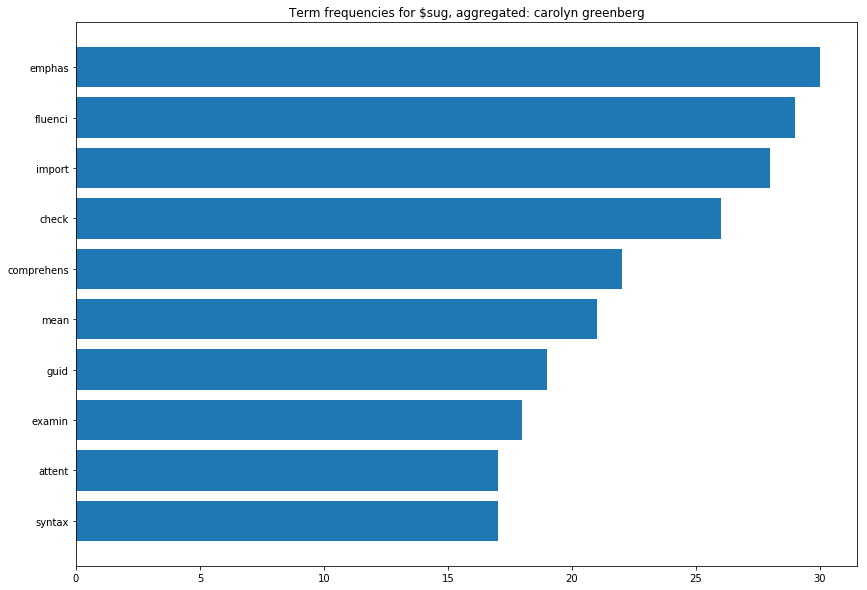

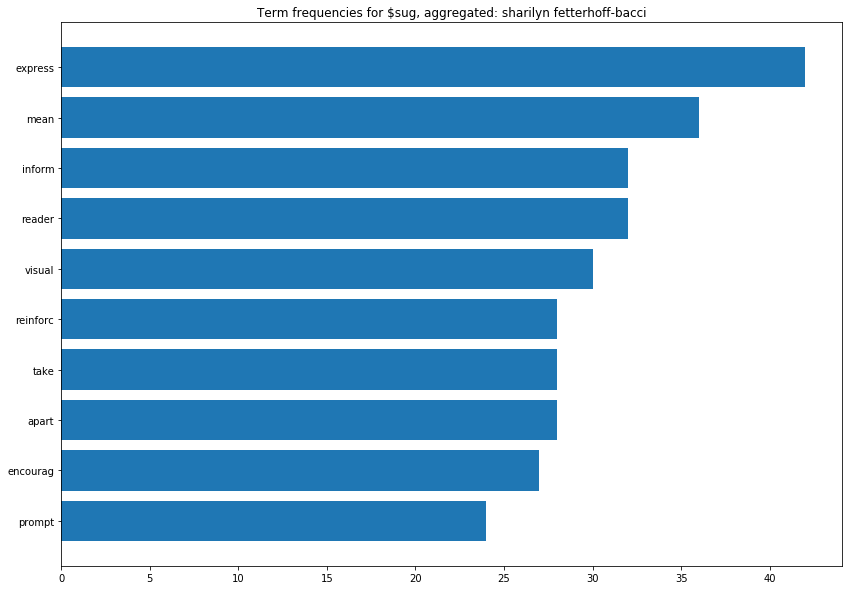

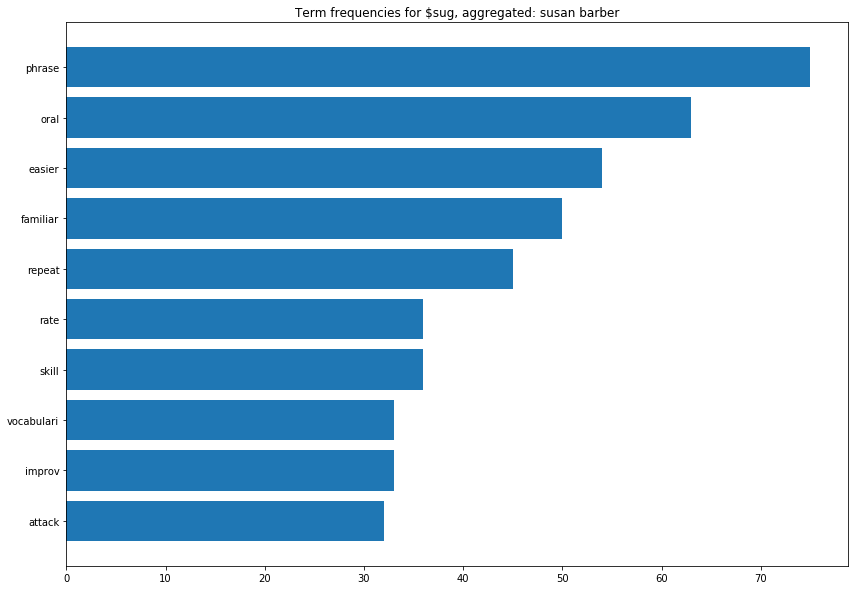

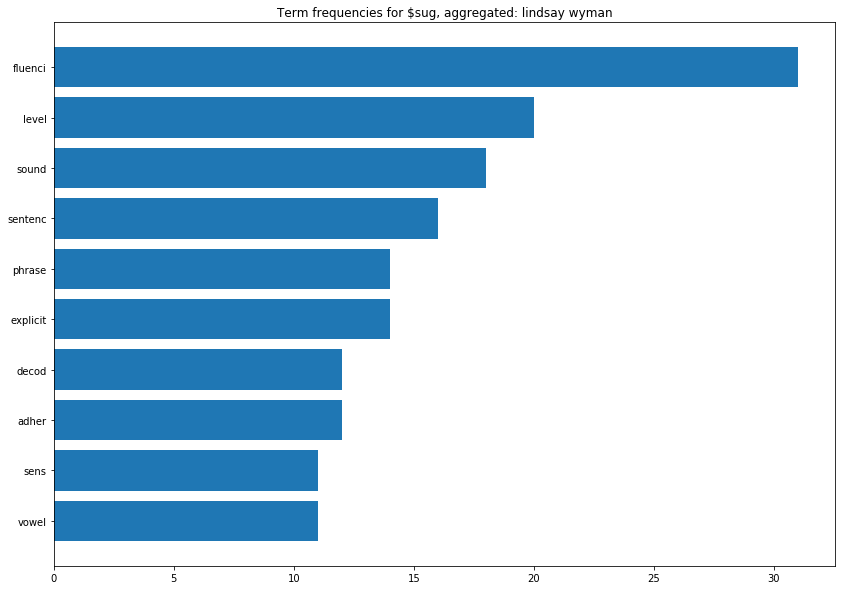

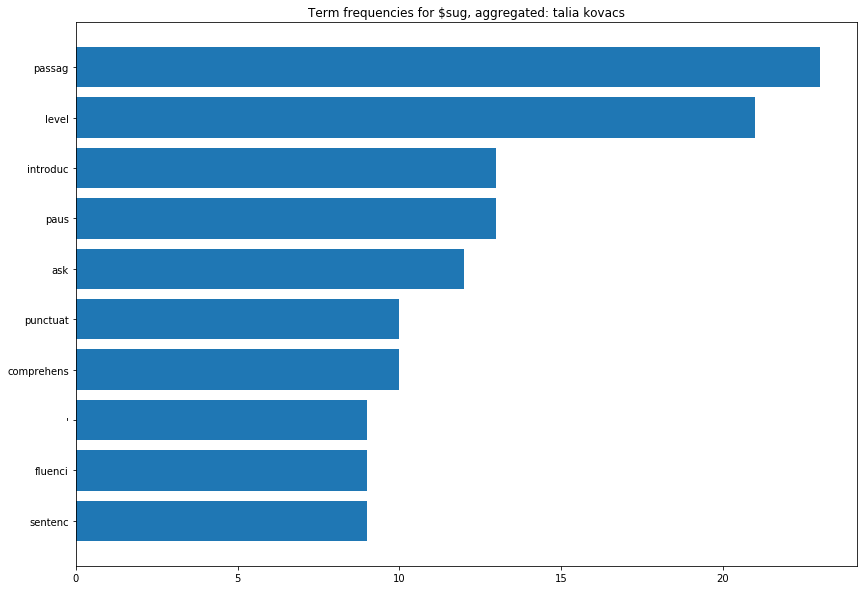

In [39]:
n = 10
for evaluator, associated in evaluator_to_all_associated_sugs.items():
    cnt = Counter()
    for w in nltk.word_tokenize(associated):
        if w not in punct and ps.stem(w) not in sw:
#         if ps.stem(w) not in sw:
            cnt[ps.stem(w)] += 1
    most_common = dict(cnt.most_common(n))
    if 'fluenci' in most_common and 'fluent' in most_common:
        most_common['fluency'] = most_common['fluenci'] + most_common['fluent']
        most_common.pop('fluenci')
        most_common.pop('fluent')
    
    sort = sorted(most_common.keys(), key=lambda k: -most_common[k])

    terms = [x for x in sort][::-1]
    freq = [most_common[x] for x in sort][::-1]

    plt.figure(figsize=(14, 10))
    plt.title('Term frequencies for $sug, aggregated: ' + evaluator)
    plt.barh(terms, freq)
    plt.show()

In [41]:
evaluator_to_sugs_wc = {
    e: Counter([
        ps.stem(w)
        for w in nltk.word_tokenize(assoc)
        if ps.stem(w) not in punct and
            ps.stem(w) not in sw
    ])
    for e, assoc in evaluator_to_all_associated_sugs.items()
}

In [42]:
normalized_e_to_freq = {}
for e, cnts in evaluator_to_sugs_wc.items():
    n_words = sum([cnts[w] for w in cnts])
    normalized_e_to_freq[e] = {
        w: cnts[w] / n_words
        for w in cnts
    }
print(normalized_e_to_freq)

{'carolyn greenberg': {'check': 0.0392156862745098, 'comprehens': 0.033182503770739065, 'similarli': 0.010558069381598794, 'level': 0.016591251885369532, 'ask': 0.013574660633484163, 'summar': 0.010558069381598794, 'passag': 0.012066365007541479, 'fluenci': 0.043740573152337855, 'emphas': 0.04524886877828054, 'import': 0.042232277526395176, 'express': 0.02262443438914027, 'appropri': 0.0196078431372549, 'speed': 0.015082956259426848, 'strive': 0.021116138763197588, 'time': 0.021116138763197588, 'addit': 0.0196078431372549, 'engag': 0.007541478129713424, 'wide': 0.007541478129713424, 'varieti': 0.00904977375565611, 'genr': 0.007541478129713424, 'independ': 0.007541478129713424, 'correct': 0.0015082956259426848, 'error': 0.0015082956259426848, 'guid': 0.02865761689291101, 'attent': 0.02564102564102564, 'cross': 0.024132730015082957, 'visual': 0.024132730015082957, 'mean': 0.03167420814479638, 'syntax': 0.02564102564102564, 'clue': 0.024132730015082957, 'stop': 0.02564102564102564, 'close